In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Check the size of img
import nibabel as nib

img = nib.load("/content/drive/MyDrive/4460_Project/IXI_paired_data/IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz")
img_data = img.get_fdata()
print("size：", img_data.shape)

size： (256, 256, 256)


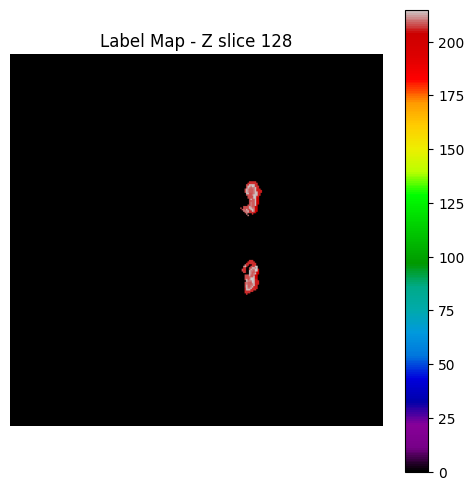

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Visualize the label file
label_img = nib.load('/content/drive/MyDrive/4460_Project/IXI_paired_data/IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_label.mgz')
label_data = label_img.get_fdata()

# Pick the middle layer
z = label_data.shape[2] // 2
slice_data = label_data[:, :, z]


plt.figure(figsize=(6, 6))
plt.imshow(slice_data, cmap='nipy_spectral')  # 彩色映射
plt.title(f'Label Map - Z slice {z}')
plt.axis('off')
plt.colorbar()  # 显示 label 值的颜色对应表
plt.show()


In [ ]:
print("Show the values of labels ：", np.unique(label_data))

In [ ]:
import os
import nibabel as nib
import numpy as np

# Paths
data_dir = '/content/drive/MyDrive/4460_Project/IXI_paired_data/'
output_img_dir = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch'
output_label_dir = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch'

# If not Make it
os.makedirs(output_img_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

# Find all .mgz img files
mgz_files = [f for f in os.listdir(data_dir) if f.endswith('.mgz') and not f.endswith('_label.mgz')]

# safe crop 96x96x96
def safe_crop(data, center, size=96):
    half = size // 2
    z, y, x = center
    return data[
        z - half:z + half,
        y - half:y + half,
        x - half:x + half
    ]

# Pairing
for img_file in mgz_files:
    label_file = img_file.replace('_t1.mgz', '_label.mgz')
    img_path = os.path.join(data_dir, img_file)
    label_path = os.path.join(data_dir, label_file)

    if not os.path.exists(label_path):
        print(f"❌ Label not found for {img_file}, skipping...")
        continue

    print(f"✅ Processing: {img_file}")

    # read img & label
    img = nib.load(img_path)
    label = nib.load(label_path)
    img_data = img.get_fdata()
    label_data = label.get_fdata()

    # Extract the labels
    hippo_labels = [203, 204, 205, 206, 208, 209, 210, 211, 212, 214, 215, 226]
    hippo_mask = np.isin(label_data, hippo_labels)

    coords = np.argwhere(hippo_mask)

    if coords.shape[0] == 0:
        print(f"⚠️ No hippocampus found in {img_file}, skipping...")
        continue

    # Set the ceter
    center = coords.mean(axis=0).astype(int)

    try:
        img_crop = safe_crop(img_data, center)
        label_crop = safe_crop(label_data, center)
    except:
        print(f"❌ Cropping out of bounds for {img_file}, skipping...")
        continue

    # Save
    base_name = img_file.replace('.mgz', '')
    nib.save(nib.Nifti1Image(img_crop, img.affine), os.path.join(output_img_dir, f'{base_name}_hippo.nii.gz'))
    nib.save(nib.Nifti1Image(label_crop, label.affine), os.path.join(output_label_dir, f'{base_name}_hippo_label.nii.gz'))


✅ Processing: IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI109-Guys-0732-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI110-Guys-0733-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI111-Guys-0734-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI112-Guys-0735-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI113-Guys-0776-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI118-Guys-0764-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI120-Guys-0766-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI121-Guys-0772-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI123-Guys-0774-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI126-HH-1437-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI128-HH-1470-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Processing: IXI130-HH-1528-T1_mri_brainmask_mni152brain_affine_tl_t1.mgz
✅ Pro

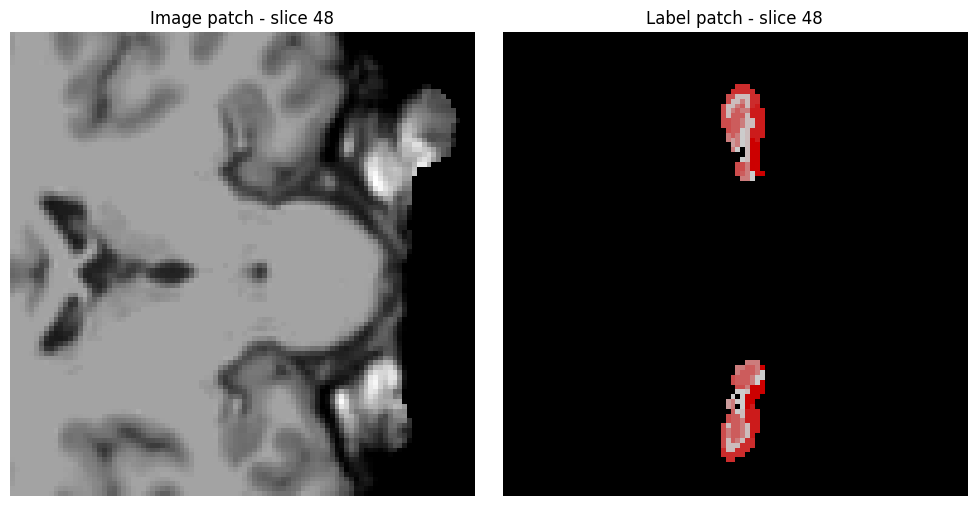

In [ ]:
# Visualize the patch
img_path = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch/IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo.nii.gz'
label_path = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch/IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz'

img = nib.load(img_path).get_fdata()
label = nib.load(label_path).get_fdata()

# pick the center slice
z = img.shape[2] // 2

# show img and label
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#
axes[0].imshow(img[:, :, z], cmap='gray')
axes[0].set_title(f'Image patch - slice {z}')
axes[0].axis('off')

axes[1].imshow(label[:, :, z], cmap='nipy_spectral')
axes[1].set_title(f'Label patch - slice {z}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Relabel for loss function
label_remap = {
    0: 0,
    203: 1, 204: 2, 205: 3, 206: 4,
    208: 5, 209: 6, 210: 7, 211: 8,
    212: 9, 214: 10, 215: 11, 226: 12
}

import os
import nibabel as nib
import numpy as np
import torch

input_dir = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch'
output_dir = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch_label'
os.makedirs(output_dir, exist_ok=True)

# Change file format into .pt
for fname in os.listdir(input_dir):
    if not fname.endswith('_hippo_label.nii.gz'):
        continue

    label_path = os.path.join(input_dir, fname)
    label_data = nib.load(label_path).get_fdata().astype(np.int16)

    # 初始化 remapped label
    remapped = np.zeros_like(label_data, dtype=np.uint8)

    for orig, new in label_remap.items():
        remapped[label_data == orig] = new

    # 保存为 .pt 文件
    label_tensor = torch.tensor(remapped, dtype=torch.long)
    pt_name = fname.replace('.nii.gz', '.pt')
    torch.save(label_tensor, os.path.join(output_dir, pt_name))

    print(f"✅ Saved remapped: {pt_name}")

✅ Saved remapped: IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI109-Guys-0732-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI110-Guys-0733-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI111-Guys-0734-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI112-Guys-0735-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI113-Guys-0776-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI118-Guys-0764-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI120-Guys-0766-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI121-Guys-0772-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI123-Guys-0774-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt
✅ Saved remapped: IXI126-HH-1437-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo

In [ ]:
# Remove the patched label in .mgz
label_dir = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch'

deleted = 0
for fname in os.listdir(label_dir):
    if fname.endswith('_hippo_label.nii.gz'):
        file_path = os.path.join(label_dir, fname)
        os.remove(file_path)
        deleted += 1
        print(f"🗑️ Deleted: {fname}")

print(f"\n✅ Total deleted: {deleted}")

🗑️ Deleted: IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI109-Guys-0732-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI110-Guys-0733-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI111-Guys-0734-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI112-Guys-0735-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI113-Guys-0776-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI118-Guys-0764-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI120-Guys-0766-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI121-Guys-0772-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI123-Guys-0774-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: IXI126-HH-1437-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.nii.gz
🗑️ Deleted: 

Show the remmap value： tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


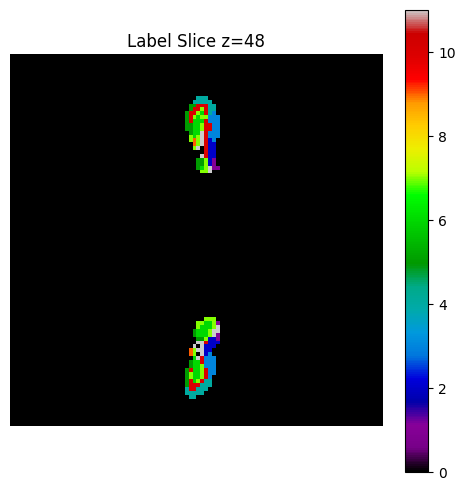

In [ ]:
import torch
import matplotlib.pyplot as plt

# Read folder
label_path = '/content/drive/MyDrive/4460_Project/hsf_IXI_patch_label/IXI108-Guys-0865-T1_mri_brainmask_mni152brain_affine_tl_t1_hippo_label.pt'
label = torch.load(label_path).numpy()
print("Show the remmap value：", torch.unique(label_tensor))

# Choose the center slice
z = label.shape[2] // 2
slice_ = label[:, :, z]

# Show the plot
plt.figure(figsize=(6, 6))
plt.imshow(slice_, cmap='nipy_spectral')
plt.title(f'Label Slice z={z}')
plt.axis('off')
plt.colorbar()
plt.show()